<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/Analysis/Scraping_Morphological_Analysis_WordCloud_Spreadsheet_Yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mecab-python3
!pip install unidic
!python -m unidic download

     |████████████████████████████████| 488 kB 24.9 MB/s 
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7426 sha256=7088b2df186fbc77c54251ef603a78393ee199517f5a1cc98f813ab9cfef48e2
  Stored in directory: /root/.cache/pip/wheels/ce/4d/f1/170bb74b559ca338113c0315c9805e16dfd0a12411ec6b1122
Successfully built unidic
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:28<00:00, 18.6MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.7/dist-packages/unidic/dicdir


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://news.yahoo.co.jp/topics/domestic"

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('div', class_='newsFeed_item_title')

In [ ]:
import MeCab
import unidic

news = ''
for e in elems:
  news += e.getText() + '\n'

print(news)

10万円給付要領 3方式から選択
警察 特定少年の起訴後は実名可
首相 大阪などで無料検査を表明
在日米軍 多部隊で出国時未検査
今季最強寒波 雪の美しさと怖さ
除雪機による事故増加 注意を
新変異株既に複数地点で 尾身氏
石原伸晃氏 助成金60万円を返納
中継 尾身茂・分科会長が会見
97-05年度生まれHPV無料接種へ
電動スケーター 規制緩和へ
週末は強い冬型 寒さや雪に注意
危険通学路7万2000カ所 対策へ
オミクロン株に首相 慎重に対応
太田昌孝氏の元秘書 在宅起訴へ
布マスク 廃棄に約6000万円か
上皇さま米寿に 穏やかな日々
市中感染 専門家「氷山の一角」
皇族確保 有識者会議が2案提出
女性皇族は結婚後も皇室に 報告
オミクロン 空港検疫で68人確認
10万円が元配偶者に 対応難しく
教員の精神疾患による休職 背景
厚労相 新変異株の広がりはない
海自艦と衝突 国への請求棄却



In [ ]:
mecab = MeCab.Tagger('')
node = mecab.parseToNode(news)
words = []
while node:
  hinshi = node.feature.split(',')[0]
  word = node.surface
  if hinshi in ['名詞']:
    origin = word
    words.append(origin)

  node = node.next

In [ ]:
import collections
count = collections.Counter(words)
print(count)
print(count.most_common(30))

Counter({'万': 5, '円': 4, '10': 2, '起訴': 2, '首相': 2, '無料': 2, '検査': 2, '雪': 2, '注意': 2, '株': 2, '尾身': 2, '対応': 2, '元': 2, '皇族': 2, '給付': 1, '要領': 1, '3': 1, '方式': 1, '選択': 1, '警察': 1, '特定': 1, '少年': 1, '実名': 1, '可': 1, '大阪': 1, '表明': 1, '在日': 1, '米軍': 1, '部隊': 1, '出国': 1, '時': 1, '今季': 1, '最強': 1, '寒波': 1, '除雪': 1, '機': 1, '事故': 1, '増加': 1, '変異': 1, '複数': 1, '地点': 1, '石原': 1, '伸晃': 1, '助成': 1, '60': 1, '返納': 1, '中継': 1, '茂': 1, '分科': 1, '会長': 1, '会見': 1, '97': 1, '05': 1, '年度': 1, '生まれ': 1, 'HPV': 1, '接種': 1, '電動': 1, 'スケーター': 1, '規制': 1, '緩和': 1, '週末': 1, '冬型': 1, '危険': 1, '通学': 1, '7': 1, '2000': 1, 'カ所': 1, '対策': 1, '慎重': 1, '太田': 1, '昌孝': 1, '秘書': 1, '在宅': 1, '布': 1, 'マスク': 1, '廃棄': 1, '6000': 1, '上皇': 1, '米寿': 1, '日々': 1, '市中': 1, '感染': 1, '専門': 1, '氷山': 1, '一角': 1, '確保': 1, '有識': 1, '会議': 1, '2': 1, '案': 1, '提出': 1, '女性': 1, '結婚': 1, '皇室': 1, '報告': 1, '空港': 1, '検疫': 1, '68': 1, '確認': 1, '配偶': 1, '教員': 1, '精神': 1, '疾患': 1, '休職': 1, '背景': 1, '厚労': 1, '変': 1, '異株': 1, '広がり': 1, '海': 

In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (8,425 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

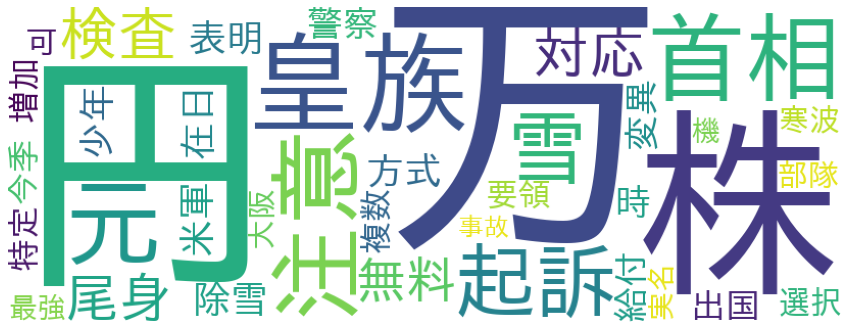

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import codecs
fpath = './fonts/IPAfont00303/ipagp.ttf'

def show_word_cloud(ws):
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    random.shuffle(ws_show)
    texts = ' '.join(ws_show)
    
    # 描画
    wc = WordCloud(background_color="white", font_path=fpath, 
                   width=820, height=312, regexp=r"[\w']+").generate(texts)
    plt.figure(figsize=(15,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

show_word_cloud(count.most_common(40))

In [ ]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
ss_name = 'News_Colab'
workbook = gc.open(ss_name)
worksheet = workbook.worksheet('YahooNews')

for string in count.keys():
  worksheet.append_row([string])